In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Read the file
df = pd.read_csv('/Users/dianaterraza/Desktop/portfolio_project/notebooks/processed_data.csv')

# Display the first few rows of the dataframe
df.head()

,DATE,SGD_USD,CNY_USD
0,2000-01-03,1.6563,8.2798
1,2000-01-04,1.6535,8.2799
2,2000-01-05,1.6560,8.2798
3,2000-01-06,1.6655,8.2797
4,2000-01-07,1.6625,8.2794


In [3]:
df.head()

,DATE,SGD_USD,CNY_USD
0,2000-01-03,1.6563,8.2798
1,2000-01-04,1.6535,8.2799
2,2000-01-05,1.6560,8.2798
3,2000-01-06,1.6655,8.2797
4,2000-01-07,1.6625,8.2794


### Feature Engineering

In [4]:
# Create lag features
for i in range(1, 13):
    df[f'lag_{i}'] = df['SGD_USD'].shift(i)

# Rolling mean & std
df['rolling_mean_3'] = df['SGD_USD'].rolling(window=3).mean()
df['rolling_std_3'] = df['SGD_USD'].rolling(window=3).std()

# Drop rows with NaN values (due to shifting)
df.dropna(inplace=True)


### Train test split

In [5]:
# Define features and target
features = df.drop(columns=['SGD_USD'])
target = df['SGD_USD']

# Train/test split (last 12 months for testing)
X_train, X_test = features[:-12], features[-12:]
y_train, y_test = target[:-12], target[-12:]


### Train Random Forest Model

In [6]:
rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)


ValueError: could not convert string to float: '2000-01-19'

In [7]:
# First, identify all columns and their data types
print(X_train.dtypes)

# Handle the date column
if 'DATE' in X_train.columns:
    # Option 1: Drop the date column
    X_train = X_train.drop(columns=['DATE'])
    X_test = X_test.drop(columns=['DATE'])
    
    # Option 2 (Alternative): Extract useful features from dates
    # X_train['day'] = pd.to_datetime(X_train['DATE']).dt.day
    # X_train['month'] = pd.to_datetime(X_train['DATE']).dt.month
    # X_train['year'] = pd.to_datetime(X_train['DATE']).dt.year
    # X_train['day_of_week'] = pd.to_datetime(X_train['DATE']).dt.dayofweek
    # X_train = X_train.drop(columns=['DATE'])
    
    # X_test['day'] = pd.to_datetime(X_test['DATE']).dt.day
    # X_test['month'] = pd.to_datetime(X_test['DATE']).dt.month
    # X_test['year'] = pd.to_datetime(X_test['DATE']).dt.year
    # X_test['day_of_week'] = pd.to_datetime(X_test['DATE']).dt.dayofweek
    # X_test = X_test.drop(columns=['DATE'])

# Now train the model
rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

# Evaluate
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))

DATE               object
CNY_USD           float64
lag_1             float64
lag_2             float64
lag_3             float64
lag_4             float64
lag_5             float64
lag_6             float64
lag_7             float64
lag_8             float64
lag_9             float64
lag_10            float64
lag_11            float64
lag_12            float64
rolling_mean_3    float64
rolling_std_3     float64
dtype: object
Random Forest MAE: 0.004261900571968495


In [8]:
for col in X_train.columns:
    print(f"{col}: {type(X_train[col].iloc[0])}")

CNY_USD: <class 'numpy.float64'>
lag_1: <class 'numpy.float64'>
lag_2: <class 'numpy.float64'>
lag_3: <class 'numpy.float64'>
lag_4: <class 'numpy.float64'>
lag_5: <class 'numpy.float64'>
lag_6: <class 'numpy.float64'>
lag_7: <class 'numpy.float64'>
lag_8: <class 'numpy.float64'>
lag_9: <class 'numpy.float64'>
lag_10: <class 'numpy.float64'>
lag_11: <class 'numpy.float64'>
lag_12: <class 'numpy.float64'>
rolling_mean_3: <class 'numpy.float64'>
rolling_std_3: <class 'numpy.float64'>


### Evaluate Performance

In [9]:
mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')


MSE: 0.0000
MAE: 0.0043


### Plot Predictions vs actual

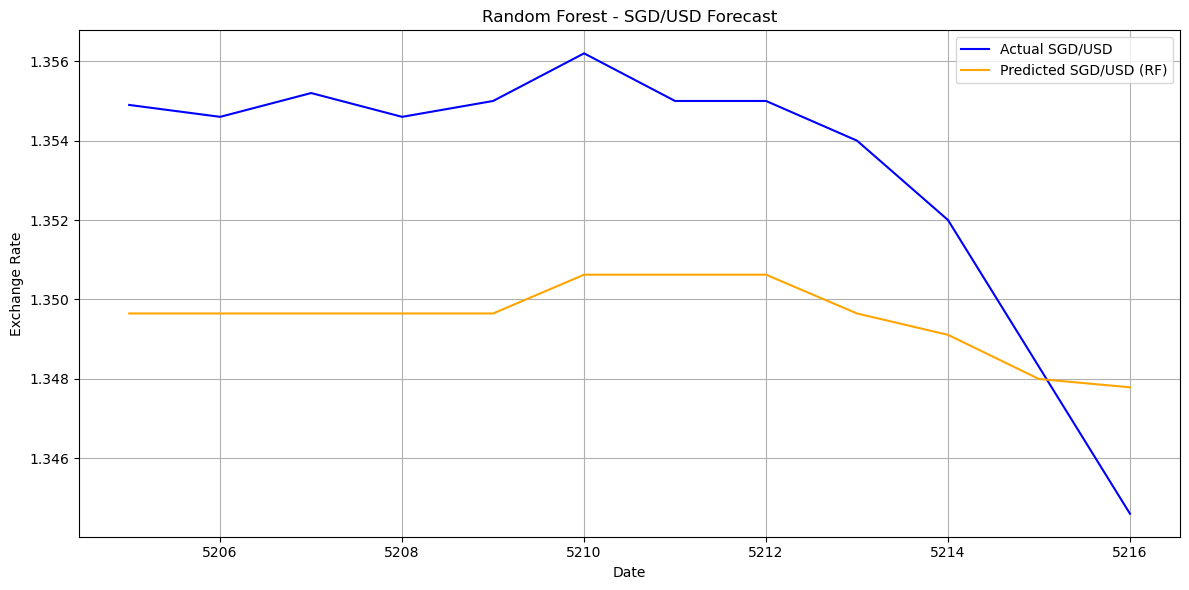

In [10]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual SGD/USD', color='blue')
plt.plot(y_test.index, rf_pred, label='Predicted SGD/USD (RF)', color='orange')
plt.title('Random Forest - SGD/USD Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
